# Introdução a Ciência dos Dados - Atividade 2

<span style="position: absolute; top: 10px; right: 10px; background: green; padding: 0.5em; color: white; border-radius: 0.25em; font-weight: bold">Vaux Gomes</span>

## Métodos de Análise Estatística dos Dados

#### Bibliotecas

In [3]:
# Imports
import math
import scipy.special as scsp
from scipy.stats import ksone
import statsmodels.api as sm

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loading

In [4]:
df = pd.read_csv('../data/iphone-olx-ce.csv', index_col=0)
df.shape

(1194, 17)

In [3]:
columns = ['region', 'areaCode', 'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']
df[columns] = df[columns].astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 0 to 1531
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   adDate               1194 non-null   float64 
 1   region               1194 non-null   category
 2   zipcode              1194 non-null   int64   
 3   areaCode             1194 non-null   category
 4   category             1194 non-null   object  
 5   paidPromotion        1194 non-null   bool    
 6   subject              1194 non-null   object  
 7   eletronicsModel      1194 non-null   category
 8   storage              1194 non-null   category
 9   color                1194 non-null   category
 10  batteryHealth        1194 non-null   category
 11  eletronicsCondition  1194 non-null   category
 12  price                1194 non-null   float64 
 13  pictures             1194 non-null   float64 
 14  sellerName           1194 non-null   object  
 15  storageGB            1194 

#### Adjustando Data

In [5]:
df.adDate = pd.to_datetime(df.adDate, unit='s')
df.adDate[0]

Timestamp('2023-05-24 21:10:08')

#### Ajustando Pictures

O número máximo de imagens em um anúncio do OLX é de 6 imagens, com exceção de anúncios de carros e imóveis. Assim vamos ajustar o número de imagens para uma porcentagem.

In [6]:
df['picturesPerc'] = df.pictures / 6

#### Ordem dos modelos

In [7]:
models = {
    'IPHONE 6': 1,            'IPHONE 6S': 2,
    'IPHONE 6S PLUS': 3,      'IPHONE SE 2020': 4,
    'IPHONE 7': 5,            'IPHONE 7 PLUS': 6,
    'IPHONE 8': 7,            'IPHONE 8 PLUS': 8,
    'IPHONE X': 9,            'IPHONE XR': 10,
    'IPHONE XS': 11,          'IPHONE XS MAX': 12,
    'IPHONE 11': 13,          'IPHONE 11 PRO': 14,
    'IPHONE 11 PRO MAX': 15,  'IPHONE 12 MINI': 16,
    'IPHONE 12': 17,          'IPHONE 13': 18,
    'IPHONE 14': 19,          'IPHONE 12 PRO': 20,
    'IPHONE 12 PRO MAX': 21,  'IPHONE 13 MINI': 22,
    'IPHONE 13 PRO': 23,      'IPHONE 13 PRO MAX': 24,
    'IPHONE 14 PLUS': 25,     'IPHONE 14 PRO': 26,
    'IPHONE 14 PRO MAX': 27,
}

df['modelOrder'] = df.apply(lambda x: models[x['eletronicsModel']], axis=1)
df = df.sort_values(['modelOrder'])

#### Macro regiões
Fonte: https://www.saude.ce.gov.br/institucional/regionalizacao/

In [8]:
# Despretenciosamente sujeita a erros

macro_regions = {
    'Acaraú': 'Fortaleza',
    'Aquiraz': 'Fortaleza',
    'Aracoiaba': 'Fortaleza',
    'Cascavel': 'Fortaleza',
    'Caucaia': 'Fortaleza',
    'Chorozinho': 'Fortaleza',
    'Eusébio': 'Fortaleza',
    'Fortaleza': 'Fortaleza',
    'Guaiúba': 'Fortaleza',
    'Itaitinga': 'Fortaleza',
    'Maracanaú': 'Fortaleza',
    'Maranguape': 'Fortaleza',
    'Pacatuba': 'Fortaleza',
    'Paraipaba': 'Fortaleza',
    'Pindoretama': 'Fortaleza',
    'São Gonçalo do Amarante': 'Fortaleza',
    'Pacajus': 'Fortaleza',
    'Horizonte': 'Fortaleza',

    'Altaneira': 'Cariri',
    'Barbalha': 'Cariri',
    'Tauá': 'Cariri',
    'Juazeiro do Norte': 'Cariri',
    'Missão Velha': 'Cariri',
    'Cedro': 'Cariri',
    'Crato': 'Cariri',
    'Jardim': 'Cariri',

    'Sobral': 'Norte',
    'Croatá': 'Norte',
    'Guaraciaba do Norte': 'Norte',

    'Aracati': 'Litoral Leste',
    'Tabuleiro do Norte': 'Litoral Leste',

    'Baturité': 'Sertão Central',
}

df['macroRegion'] = df.apply(lambda x: macro_regions[x['region']], axis=1)

### 1. Medidas de Tendência Central

#### Moda

In [10]:
columns = ['region', 'areaCode', 'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']
df[columns].describe()

,areaCode
count,1194.000000
mean,85.125628
std,0.601169
min,85.000000
25%,85.000000
50%,85.000000
75%,85.000000
max,88.000000


<span style="color:#9b9b9b">Variáveis categóricas de interesse</span>

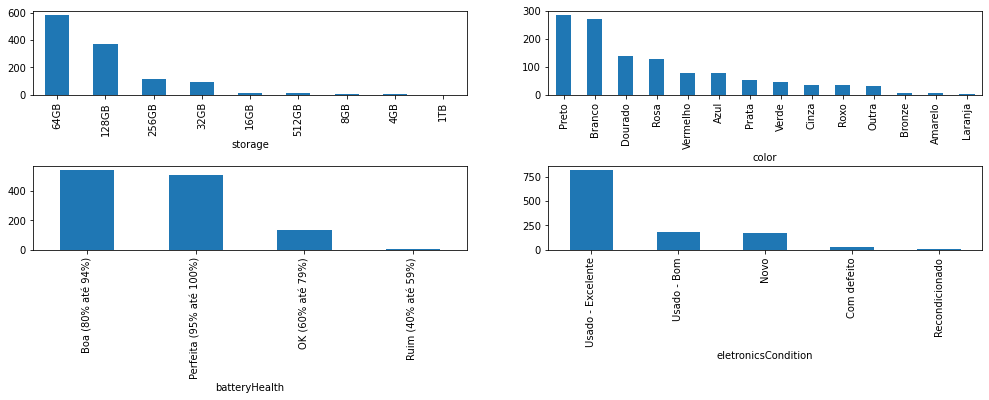

In [12]:
#
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
fig.tight_layout(pad=5)

_ = df['storage']            .value_counts().plot(kind='bar', ax=axes[0, 0])
_ = df['color']              .value_counts().plot(kind='bar', ax=axes[0, 1])
_ = df['batteryHealth']      .value_counts().plot(kind='bar', ax=axes[1, 0])
_ = df['eletronicsCondition'].value_counts().plot(kind='bar', ax=axes[1, 1])

#### Média

A maior parte das colunas do nosso _dataset_ têm natureza categórica. As colunas que possuem de fato uma interpretação numérica são: `price`, `pictures` (número de imagens no anúncio) e `subjectLength` (comprimento do  título do anúncio). Ainda assim elas tem escalas bem diferentes. Faz mais sentido agrupar os dados pelo modelo do produto.

In [11]:
df[['price', 'pictures', 'subjectLength']].mean()

price            2218.003350
pictures            4.144891
subjectLength      21.517588
dtype: float64

In [12]:
g_model = df.groupby(['eletronicsModel'])
g_storage = df.groupby(['storage'])
g_color = df.groupby(['color'])
g_region = df.groupby(['region'])

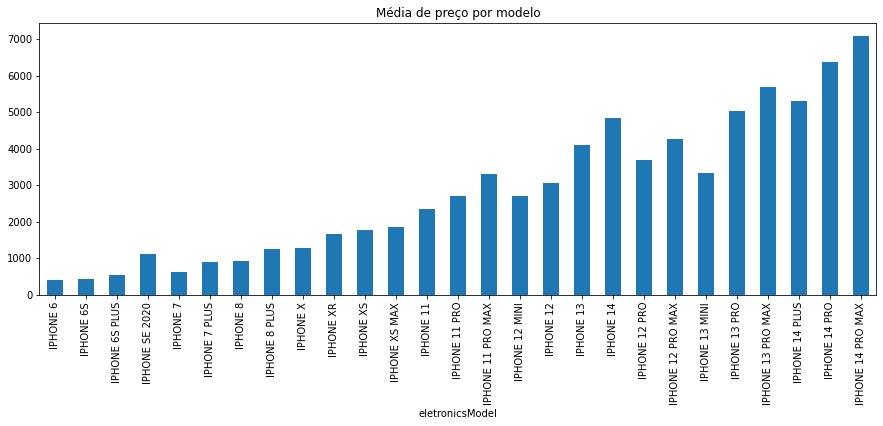

In [13]:
_ = g_model[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por modelo')

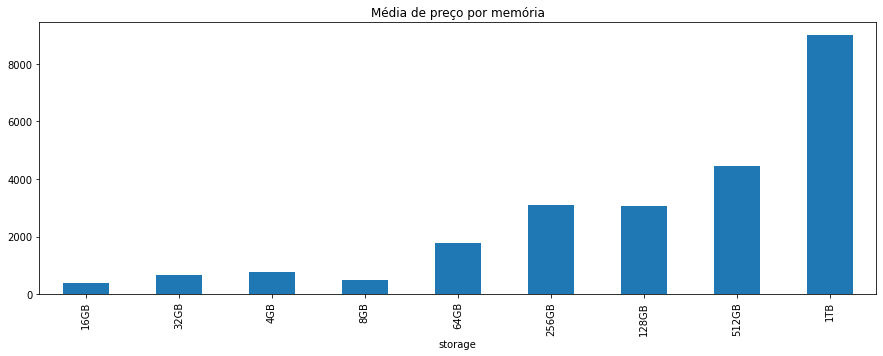

In [14]:
_ = g_storage[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por memória')

In [15]:
print(f'Número de anúncios de 1TB: {(df.storage == "1TB").sum()}')

Número de anúncios de 1TB: 1


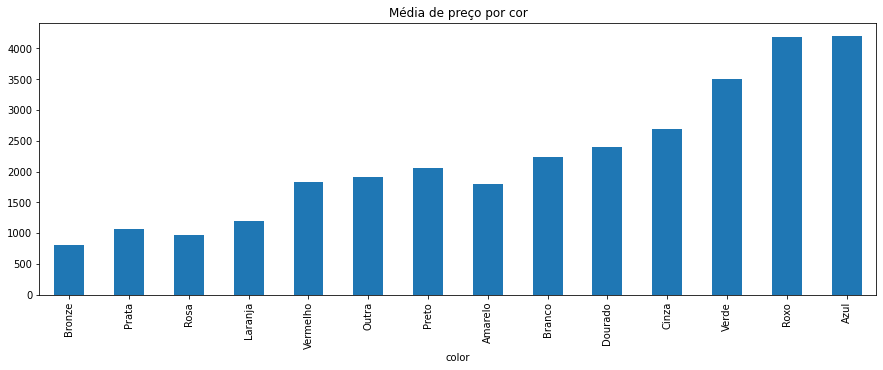

In [16]:
_ = g_color[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por cor')

In [14]:
print(f'Número de anúncios de cor azul: {(df.color == "Azul").sum()}')

Número de anúncios de cor azul: 76


In [16]:
76/df.shape[0] * 100

6.365159128978225

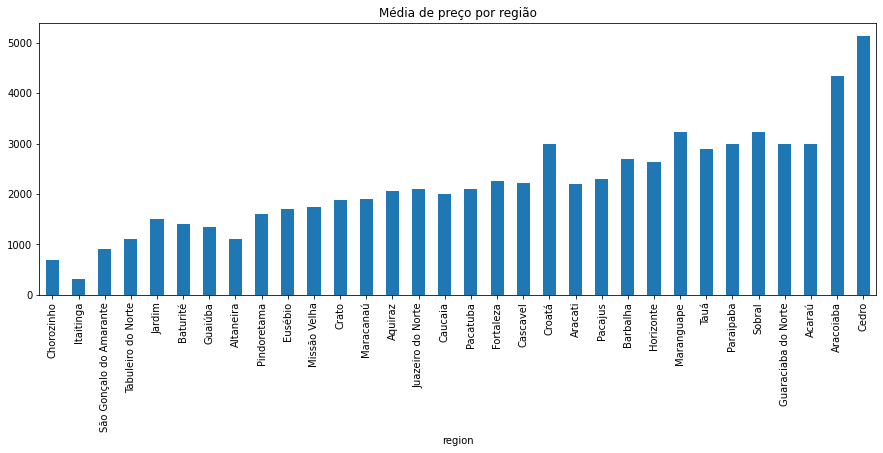

In [17]:
_ = g_region[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por região')

In [19]:
(df.region == "Fortaleza").sum()/df.shape[0]

0.7889447236180904

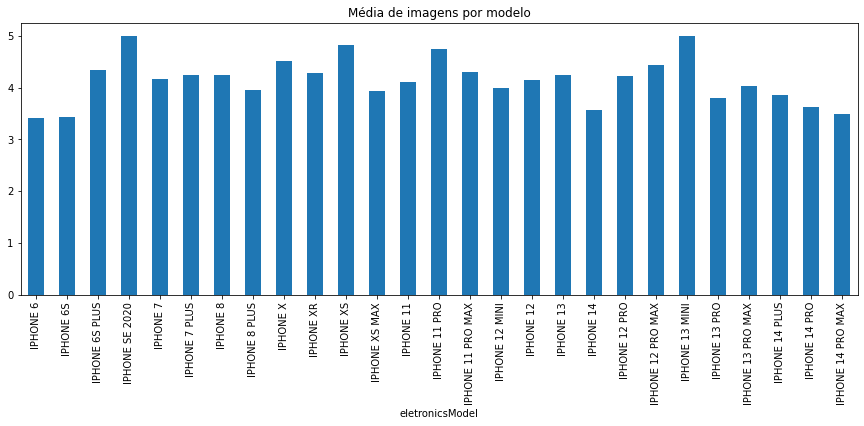

In [18]:
# Sem padrão aparente
_ = g_model[['pictures', 'modelOrder']].mean().sort_values(['modelOrder'])['pictures'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de imagens por modelo')

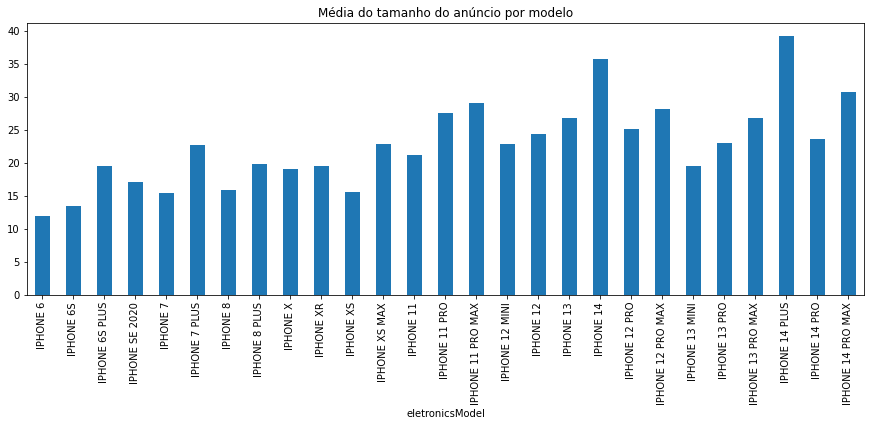

In [19]:
# Leve tendência ascendente ou lateralizada
_ = g_model[['subjectLength', 'modelOrder']].mean().sort_values(['modelOrder'])['subjectLength'] \
    .plot(kind='bar', figsize=(15, 5), title='Média do tamanho do anúncio por modelo')

### 2. Medidas de Variabilidade

In [20]:
df[['price', 'pictures', 'picturesPerc', 'subjectLength']].describe().loc[['mean', 'std']]

,price,pictures,picturesPerc,subjectLength
mean,2218.003350,4.144891,0.690815,21.517588
std,1581.569046,1.659117,0.276519,13.486827


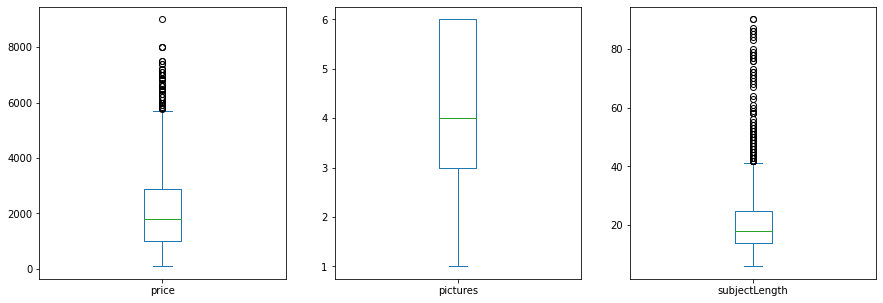

In [21]:
#
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# fig.tight_layout(pad=6)

_ = df.plot(column=['price'], kind='box', ax=axes[0])
_ = df.plot(column=['pictures'], kind='box', ax=axes[1])
_ = df.plot(column=['subjectLength'], kind='box', ax=axes[2])

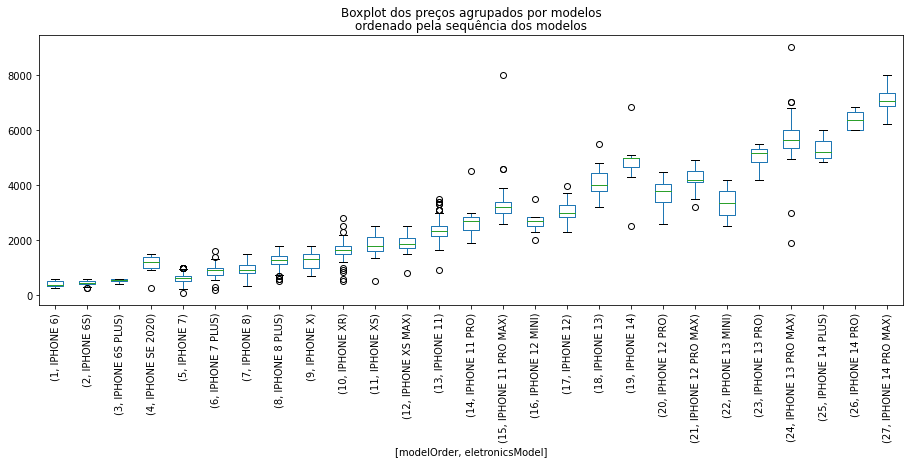

In [22]:
_ = df.boxplot(by=['modelOrder', 'eletronicsModel'], column=['price'], rot=90, grid=False, figsize=(15, 5))
_ = plt.title('ordenado pela sequência dos modelos')
_ = plt.suptitle('Boxplot dos preços agrupados por modelos') # that's what 

### 3. Tabela de Frequência e Histograma

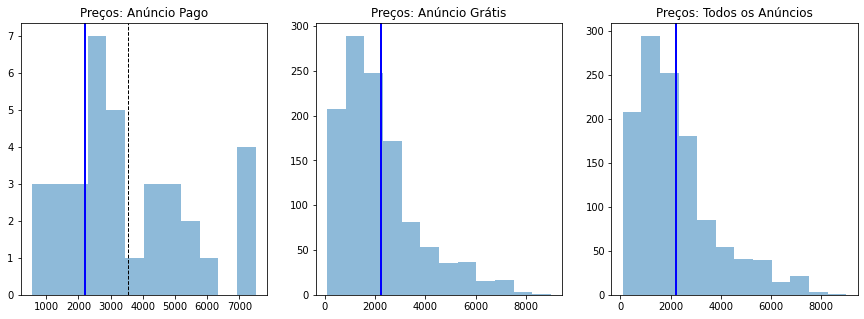

In [23]:
#
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#
paid = df[df.paidPromotion==True]
free = df[df.paidPromotion==False]

# Bins
k = math.ceil(1 + 3.3 * math.log10(df.shape[0]))

#
_ = paid.price.hist(bins=k, grid=False, ax=axes[0], alpha=0.5)
axes[0].axvline(paid.price.mean(), color='k', linestyle='dashed', linewidth=1)
axes[0].title.set_text("Preços: Anúncio Pago")

_ = free.price.hist(bins=k, grid=False, ax=axes[1], alpha=0.5)
axes[1].axvline(free.price.mean(), color='k', linestyle='dashed', linewidth=1)
axes[1].title.set_text("Preços: Anúncio Grátis")

_ = df.price.hist(bins=k, grid=False, ax=axes[2], alpha=0.5)
axes[2].title.set_text("Preços: Todos os Anúncios")

# Mostrando média geral em todos os plots
for i in range(3): 
    axes[i].axvline(df.price.mean(), color='b', linestyle='-', linewidth=2)


### 4. QQ-Plot

O desenho do gráfico indica que nenhum dos atributos tem distribuição normal

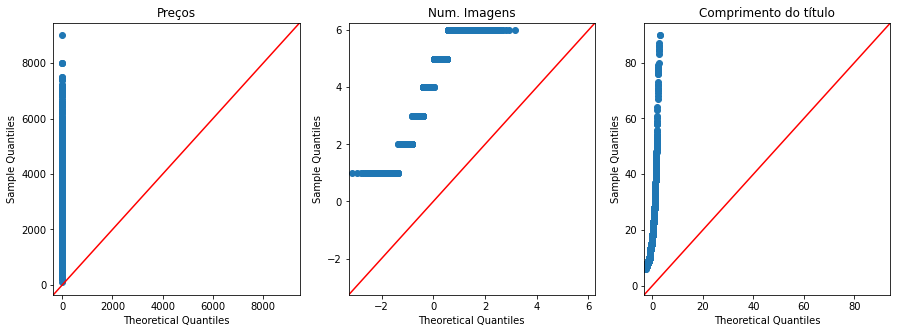

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

_ = sm.qqplot(df['price'], line='45', ax=axes[0])
axes[0].title.set_text("Preços")

_ = sm.qqplot(df['pictures'], line='45', ax=axes[1])
axes[1].title.set_text("Num. Imagens")

_ = sm.qqplot(df['subjectLength'], line='45', ax=axes[2])
axes[2].title.set_text("Comprimento do título")

### 5. Correlações

In [25]:
# Removendo algumas colunas
df_ = df.drop(columns=[
    'adDate', 'region', 'zipcode', 'areaCode', 'category', 'paidPromotion', 'subject', 
    'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition', 
    'sellerName','subjectLength', 'picturesPerc', 'modelOrder', 'macroRegion',])

# One hot encoding
df_ = df_.join(pd.get_dummies(df.macroRegion))
df_ = df_.join(pd.get_dummies(df.eletronicsModel))
df_ = df_.join(pd.get_dummies(df.color))
df_ = df_.join(pd.get_dummies(df.batteryHealth))
df_ = df_.join(pd.get_dummies(df.eletronicsCondition))

#
correlation_matrix = df_.corr()

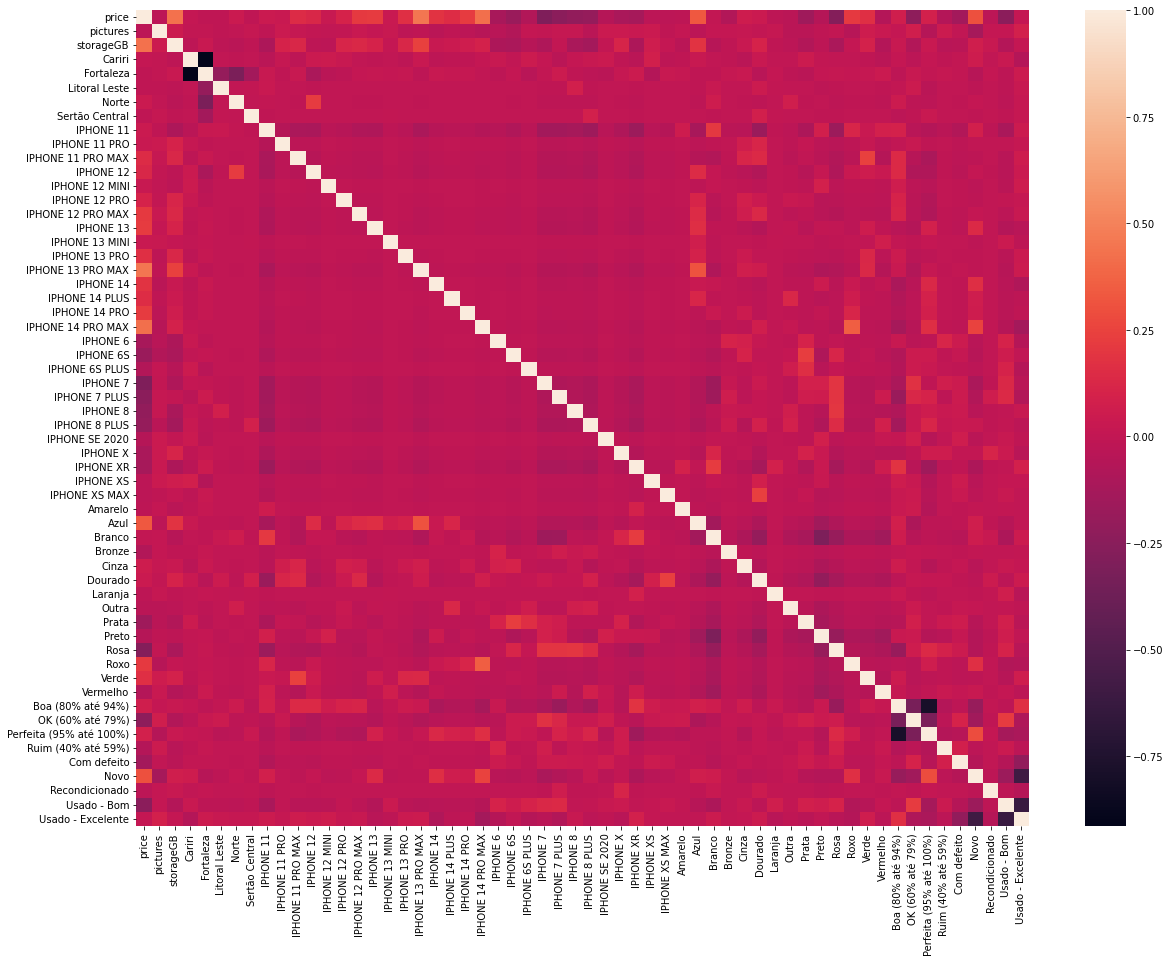

In [26]:
fig, ax = plt.subplots(figsize=(20, 15))
_ = sns.heatmap(correlation_matrix, ax=ax)

Mesmos analizando a correlação de forma visual, não é possível identificar correlações que sejam excelentes para separar bom os dados.

### 7. Teste de Normalidade

In [20]:
def normality_test(xi: pd.Series):
    # Transform Series to frame
    data = xi.rename('xi').to_frame()
    
    # Frequência simples
    data = data.groupby(['xi']).size().reset_index(name='fi')

    # Frequência realtiva
    data['fri'] = data.fi/data.shape[0]

    # Frequência acumulada
    data['Fi'] = data.fi.cumsum()

    # Frequência acumulada realtiva
    data['Fri'] = data.Fi/data.shape[0]

    # Normalização
    mean = data.xi.mean()
    std  = data.xi.std()

    data['Zi'] = data.apply(lambda x: (x.xi - mean)/std, axis=1)

    # P Value
    data['pVali'] = data['Zi'].apply(lambda z: 0.5 * (1 + scsp.erf(z / np.sqrt(2))))

    # D Negativo
    data['dneg'] = abs(data.pVali - data.Fri)

    # D Positivo
    data['dpos'] = data.Fri

    for i in range(data.shape[0]):
        if i > 0:
            data['dpos'].iloc[i] = data.pVali.iloc[i] - data.Fri.iloc[i-1]

    # Máximo valor entre dneg e dpos
    d = (data[['dneg','dpos']].max()).max()

    # # P-Value
    alpha = 0.05
    p_value = ksone.ppf(1 - alpha/2, data.shape[0])

    cond = '<' if d < p_value else '>='
    res = '' if d < p_value else 'NÃO '

    print(f'D: {d:.4}')
    print(f'p-value: {p_value:.4}')
    print(f'Os dados {res}seguem uma distribuição normal')
    
    #
    return data

#### Price

D: 4.719
p-value: 0.09311
Os dados NÃO seguem uma distribuição normal


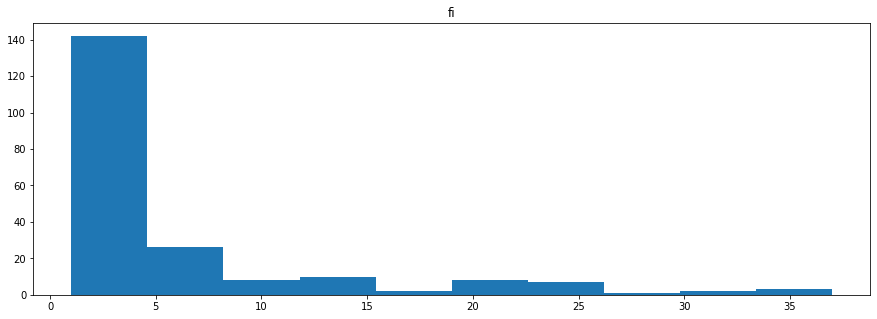

In [21]:
_ = normality_test(df['price']).hist(['fi'], grid=False, figsize=(15, 5))

#### Pictures

D: 198.1
p-value: 0.5193
Os dados NÃO seguem uma distribuição normal


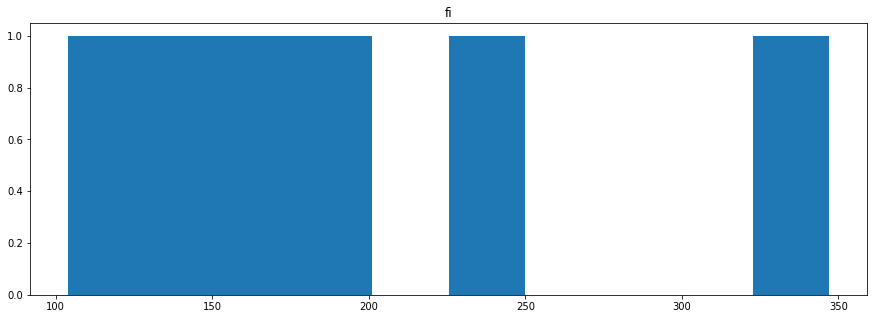

In [29]:
_ = normality_test(df['pictures']).hist(['fi'], grid=False, figsize=(15, 5))

D: 14.95
p-value: 0.1544
Os dados NÃO seguem uma distribuição normal


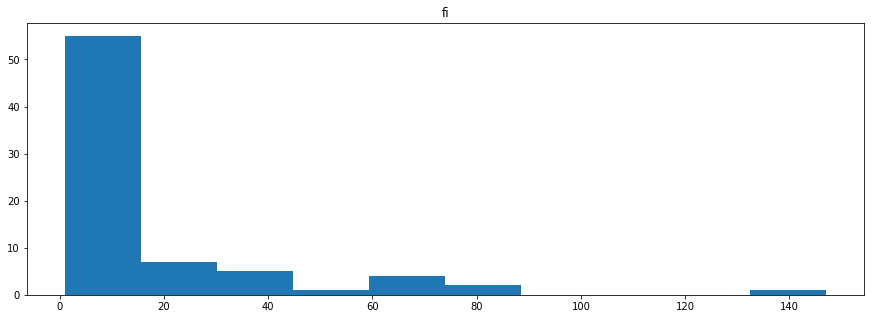

In [22]:
_ = normality_test(df['subjectLength']).hist(['fi'], grid=False, figsize=(15, 5))

### 8. Best Fit Distribution 

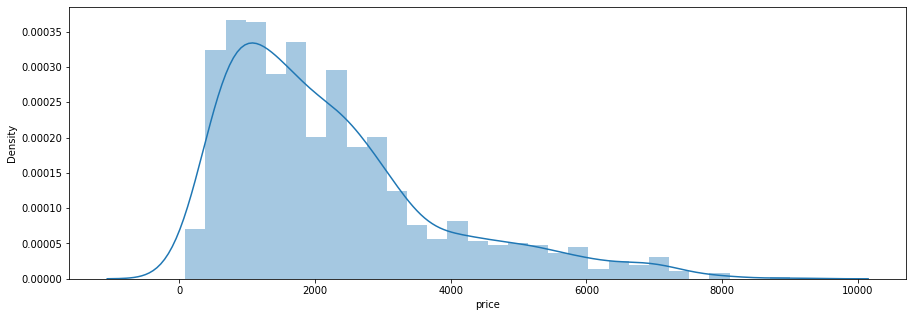

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = sns.distplot(df.price, bins=30, ax=ax)